# Data Analysis Setup
Importing pandas library which will be used for data manipulation and analysis throughout this notebook.

In [3]:
#installing libraries
import pandas as pd

# Loading Transaction Data
Reading the transaction data from CSV file into a pandas DataFrame. This contains customer transactions with their IDs, dates, and amounts.

In [4]:
trxn = pd.read_csv('Retail_Data_Transactions.csv')
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


# Loading Response Data
Reading the customer response data from CSV file. This likely contains information about customer behavior or survey responses.

In [5]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


# Merging Datasets
Combining transaction and response data using a left join on customer_id. This ensures we keep all transactions and match them with corresponding response data if available.

In [6]:
df = trxn.merge(response, on='customer_id', how='left')
dfdf = trxn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


# Initial Data Exploration
Checking the basic characteristics of our dataset:
- Data types of each column
- Dataset dimensions
- First few rows of data

In [7]:
#features
df.dtypes
df.shape
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


# Statistical Summary
Generating descriptive statistics for numerical columns including count, mean, standard deviation, min, max, and quartile values.

In [8]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


# Missing Value Analysis
Checking for null values in each column to identify any data completeness issues.

In [9]:
#Missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

# Handling Missing Values
Removing any rows with missing values to ensure data completeness for analysis.

In [10]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


# Data Type Conversion
Improving data quality by:
- Converting transaction dates to datetime format
- Ensuring response values are stored as integers

In [11]:
#Change Dtypes
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30436\3793289222.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30436\3793289222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date'] = pd.to_datetime(df['trans_date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30436\3793289222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [12]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

# Outlier Detection - Transaction Amount
Using Z-score method to identify outliers in transaction amounts. Points with Z-score > 3 are considered outliers (more than 3 standard deviations from the mean).

In [13]:
# check for outliers
# Z-Score
from scipy import stats
import numpy as np

# calculate Z-score
z_score = np.abs(stats.zscore(df['tran_amount']))

# set threshold
threshold = 3
outliers = z_score > threshold
print(outliers)

[False False False ... False False False]


# Outlier Detection - Response Values
Checking for outliers in customer response values using the same Z-score method.

In [14]:
# calculate Z-score
z_score = np.abs(stats.zscore(df['response']))

# set threshold
threshold = 3
outliers = z_score > threshold
print(outliers)

[False False False ... False False False]


# Response Distribution Visualization
Creating a box plot to visualize the distribution of response values and identify potential outliers.

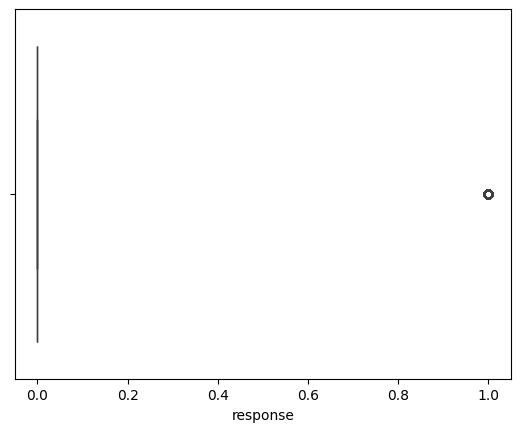

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['response'])
plt.show()

# Transaction Amount Distribution
Visualizing the distribution of transaction amounts using a box plot to identify potential outliers.

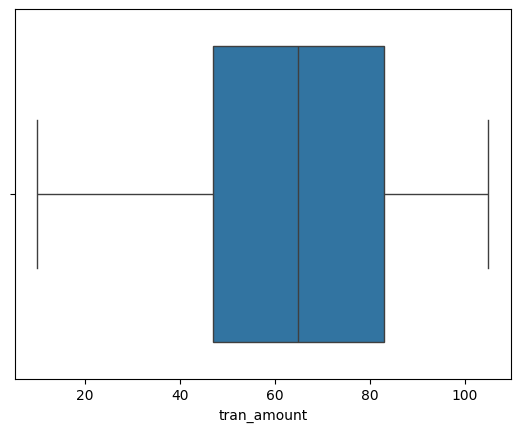

In [16]:
sns.boxplot(x=df['tran_amount'])
plt.show()

# Feature Engineering
Extracting month from transaction dates to enable monthly trend analysis.

In [17]:
# Creating new columns
df['month'] = df['trans_date'].dt.month
df# Creating new columns
df['month'] = df['trans_date'].dt.month
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30436\1480784585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['trans_date'].dt.month
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30436\1480784585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


# Top Performing Months
Identifying the three months with highest total transaction amounts to understand seasonal patterns.

In [18]:
# Which three months had the highest transaction amounts?

monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


# Most Frequent Customers
Identifying top 5 customers based on number of transactions to understand customer engagement.

In [19]:
# Customers having highest number of orders

customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts.columns = ['customer_id', 'counts']

# Sort
top_5_customers = customer_counts.sort_values(by='counts', ascending=False).head(5)
top_5_customers

,customer_id,counts
0,CS4424,39
1,CS4320,38
2,CS3799,36
4,CS1215,35
3,CS3805,35


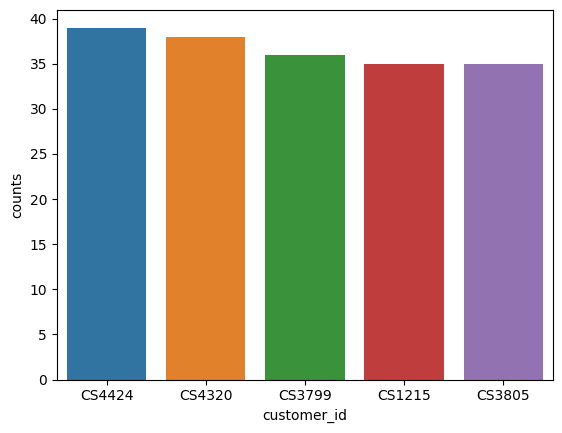

In [20]:
sns.barplot(x='customer_id', y='counts', hue='customer_id', data=top_5_customers)
plt.show()

# High-Value Customers
Identifying top customers based on total transaction value to understand customer value distribution.

In [21]:
# Customers having highest transaction value

transaction_value = df.groupby('customer_id')['tran_amount'].sum().reset_index()
transaction_value.columns = ['customer_id', 'tran_amount']

# Sort
transaction_value = transaction_value.sort_values(by='tran_amount', ascending=False)
transaction_value.head()


,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


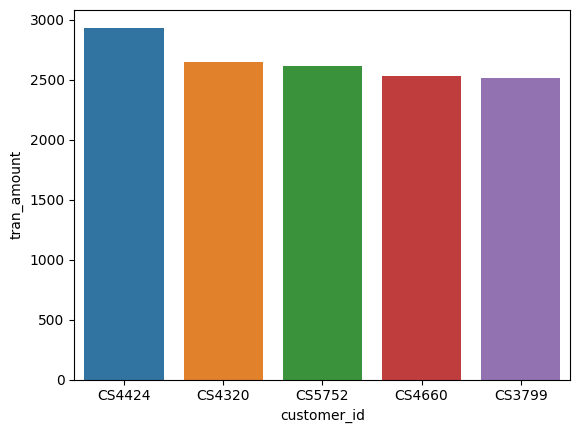

In [22]:
sns.barplot(x='customer_id', y='tran_amount', hue='customer_id', data=transaction_value.head())
plt.show()


### ADVANCED ANALYTICS
TIME SERIES ANALYSIS

# Monthly Sales Trend Analysis
Creating a time series plot of monthly sales to visualize trends and patterns over time.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30436\2418810838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


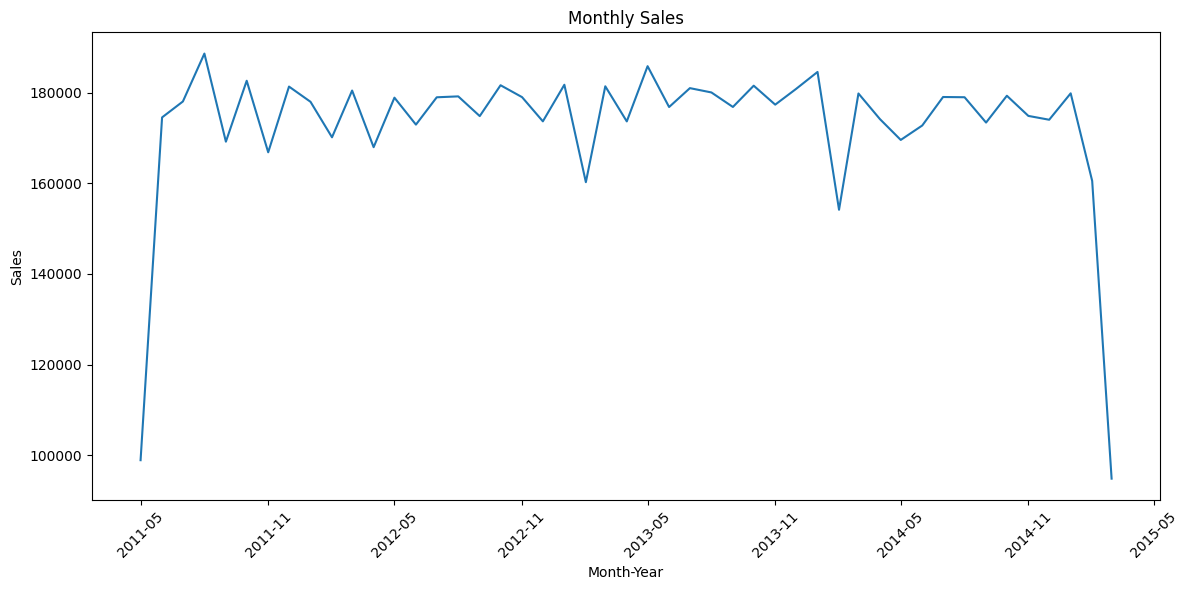

In [23]:
import matplotlib.dates as mdates

df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index=monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RFM Analysis
Calculating key customer metrics:
- Recency: Time since last purchase
- Frequency: Number of purchases
- Monetary: Total amount spent

In [24]:
# Recency
recency = df.groupby('customer_id')['trans_date'].max()

# Frequency
frequency = df.groupby('customer_id')['trans_date'].count()

# Monetary
monetary = df.groupby('customer_id')['tran_amount'].sum()

# Combine
rfm = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


# Customer Segmentation
Segmenting customers into three categories based on RFM scores:
- P0: High-value (Recent buyers, high frequency, high monetary value)
- P1: Medium-value (Moderate recency, frequency, and monetary value)
- P2: Low-value (All others)

In [25]:
#customer segmentation
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetary']>1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetary']<=1000):
        return 'P1'
    else:
        return 'P2'

rfm['Segment']=rfm.apply(segment_customer, axis=1)

In [26]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


### CHURN ANALYSIS

# Customer Churn Distribution
Visualizing the distribution of churned vs active customers using response values.

ANALYSING TOP CUSTOMERS

<Axes: xlabel='response'>

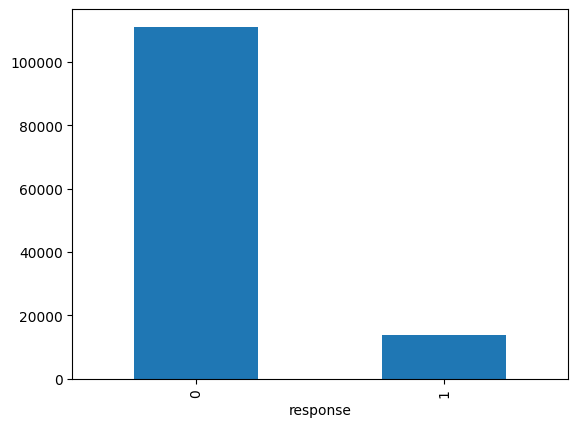

In [27]:
# Count the number of churned and active users
churn_counts = df['response'].value_counts()

# Plot
churn_counts.plot(kind='bar')

# Top Customer Trends
Analyzing sales trends for top 5 customers over time to understand their purchasing patterns.

<Axes: xlabel='month_year'>

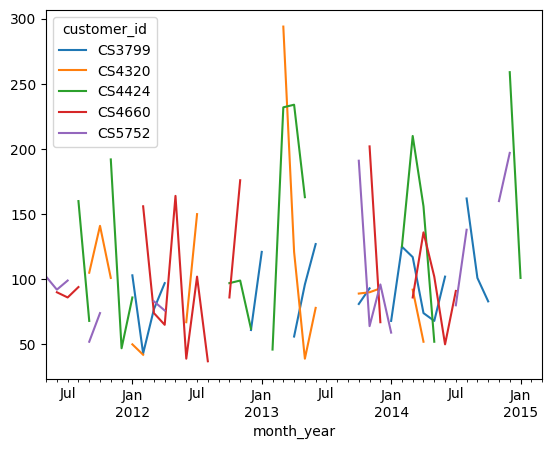

In [28]:
top_5_cus = monetary.sort_values(ascending=False).head(5).index
top_customers_df = df[df['customer_id'].isin(top_5_cus)]
top_customer_sales = top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

# Exporting Main Analysis Data
Saving the processed and analyzed data to a CSV file for future reference.

In [29]:
df.to_csv('MainData.csv')

# Exporting Advanced Analysis
Saving the RFM analysis results and customer segmentation data to a separate CSV file.

In [30]:
rfm.to_csv('AddAnlys.csv')

# Loading and Visualizing Saved Analysis

## Loading RFM Analysis Data
- Loading the previously saved RFM analysis from 'AddAnlys.csv'
- Contains customer segmentation and metrics (Recency, Frequency, Monetary value)

In [31]:
# loading the AddAnlys.csv
addanlys=pd.read_csv('AddAnlys.csv')
print(addanlys.head())

  customer_id     recency  frequency  monetary Segment
0      CS1112  2015-01-14         15      1012      P0
1      CS1113  2015-02-09         20      1490      P0
2      CS1114  2015-02-12         19      1432      P0
3      CS1115  2015-03-05         22      1659      P0
4      CS1116  2014-08-25         13       857      P2


## Customer Segment Visualization

### Scatter Plot Analysis
- X-axis: Purchase Frequency (number of transactions)
- Y-axis: Monetary Value (total spend)
- Points colored by customer segment (P0, P2)
- Alpha = 0.6 for better visualization of overlapping points
- Helps identify relationships between purchase frequency and spending

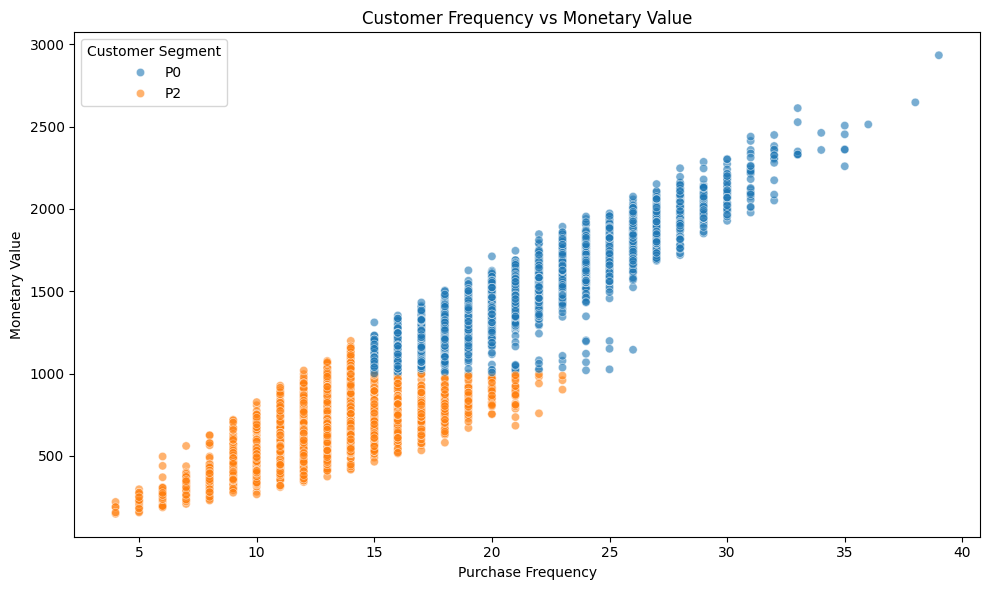

In [32]:
# Creating a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=addanlys, x='frequency', y='monetary', hue='Segment', alpha=0.6)
plt.title('Customer Frequency vs Monetary Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Monetary Value')
plt.legend(title='Customer Segment')
plt.tight_layout()
plt.show()

### Pie Chart Analysis
- Shows distribution of customer segments
- Uses contrasting colors for better visibility
- Includes percentage labels
- Legend identifies segments:
  * P0: High-Value Customers
  * P2: Low-Value Customers

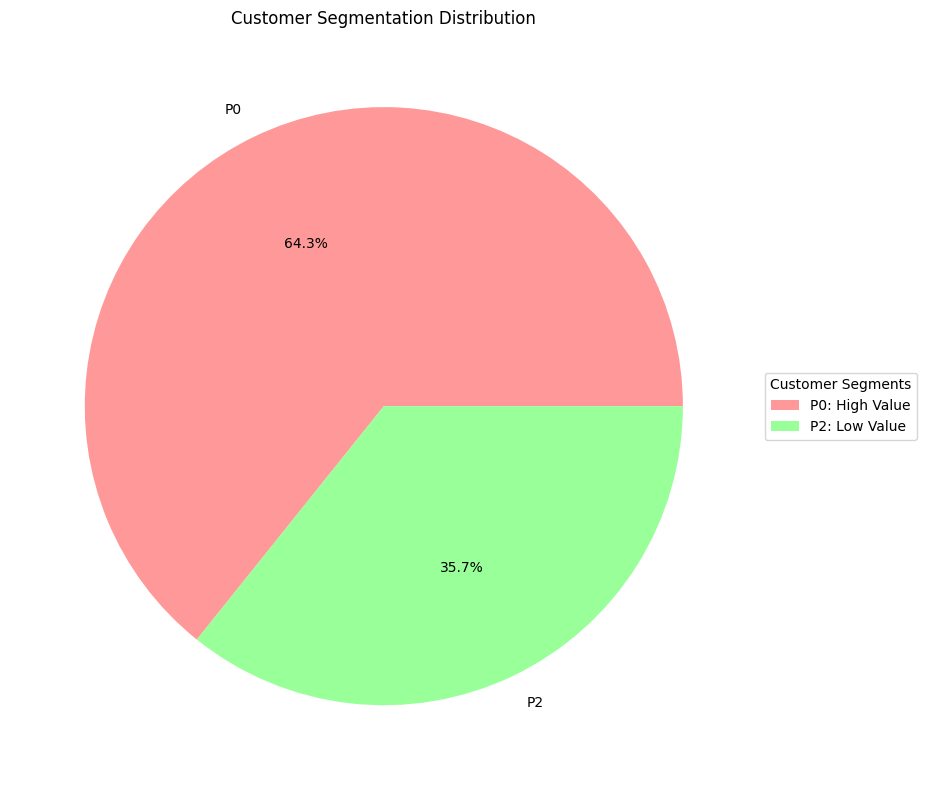

In [33]:
# Create pie chart for customer segmentation
plt.figure(figsize=(10, 8))

# Calculate segment sizes
segment_counts = addanlys['Segment'].value_counts()

# Create pie chart
plt.pie(segment_counts.values, 
        labels=segment_counts.index,
        autopct='%1.1f%%',
        colors=['#ff9999','#99ff99'],
        )

# Add title
plt.title('Customer Segmentation Distribution')

# Add legend
plt.legend(title='Customer Segments', 
          labels=['P0: High Value', 'P2: Low Value'],
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Statistical Analysis of Transaction Data

## Data Loading and Cleaning
- Loading the processed main dataset from 'MainData.csv'
- Removing unnecessary index column ('Unnamed: 0')
- Preparing data for statistical analysis

In [34]:
# loading main data
maindata=pd.read_csv('MainData.csv')
print(maindata.head())

   Unnamed: 0 customer_id  trans_date  tran_amount  response  month month_year
0           0      CS5295  2013-02-11           35         1      2    2013-02
1           1      CS4768  2015-03-15           39         1      3    2015-03
2           2      CS2122  2013-02-26           52         0      2    2013-02
3           3      CS1217  2011-11-16           99         0     11    2011-11
4           4      CS1850  2013-11-20           78         0     11    2013-11


In [35]:
# deleting the unnecessary columns
maindata = maindata.drop('Unnamed: 0', axis=1)
print(maindata.head())

  customer_id  trans_date  tran_amount  response  month month_year
0      CS5295  2013-02-11           35         1      2    2013-02
1      CS4768  2015-03-15           39         1      3    2015-03
2      CS2122  2013-02-26           52         0      2    2013-02
3      CS1217  2011-11-16           99         0     11    2011-11
4      CS1850  2013-11-20           78         0     11    2013-11


## Transaction Amount Analysis

### Box Plot Visualization
- Shows distribution of transaction amounts
- Identifies outliers
- Displays quartiles and median

### Statistical Measures
- Mean: Average transaction amount
- Median: Middle value (50th percentile)
- Q1: 25th percentile
- Q3: 75th percentile
- IQR: Interquartile range (Q3 - Q1)
- Min/Max: Range of transaction amounts

### Outlier Detection
- Uses 1.5 * IQR rule
- Lower bound = Q1 - 1.5 * IQR
- Upper bound = Q3 + 1.5 * IQR
- Values beyond these bounds are considered outliers

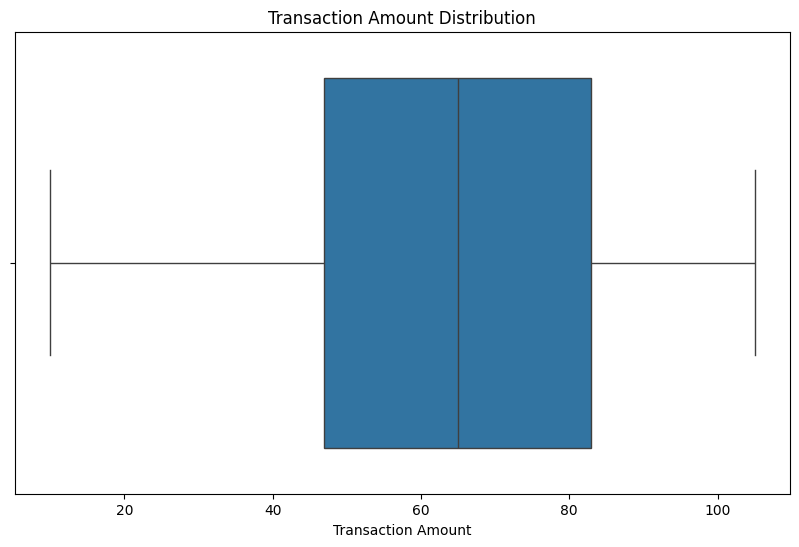


Transaction Amount Statistics:
Mean: 65.00
Median: 65.00
Q1 (25th percentile): 47.00
Q3 (75th percentile): 83.00
IQR: 36.00
Minimum: 10.00
Maximum: 105.00

Outlier Boundaries:
Lower bound: -7.00
Upper bound: 137.00


In [36]:
# Create boxplot and get statistical summary
plt.figure(figsize=(10, 6))
sns.boxplot(x=maindata['tran_amount'])
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.show()

# Calculate statistical measures
stats = maindata['tran_amount'].describe()
q1 = stats['25%']
q3 = stats['75%']
iqr = q3 - q1

print("\nTransaction Amount Statistics:")
print(f"Mean: {stats['mean']:.2f}")
print(f"Median: {stats['50%']:.2f}")
print(f"Q1 (25th percentile): {q1:.2f}")
print(f"Q3 (75th percentile): {q3:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Minimum: {stats['min']:.2f}")
print(f"Maximum: {stats['max']:.2f}")

# Calculate outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"\nOutlier Boundaries:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")